<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/filippaolofsson-lab5/Lab5/filippaolofsson_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: integration**
**Filippa Olofsson**

# **Abstract**

This lab consists of 4 different ways of approximating integrals. The functions are 2-point Gauss quadrature, 3-point edge midpoint quadrature, the Monte Carlo quadrature over the unit interval, and the Monte Carlo quadrature over the reference triangle. 

The two first algorithms are tested by comparing the difference of the approximated integral with the real value of the integral. Both algorithms passed the test with a difference less than $10^{-10}$.

The two Monte carlo algorithms are tested by plotting the convergence rate, which can be seen follows the curve $\frac{1}{\sqrt(n)}$.

#**About the code**

In [42]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [43]:
# Load neccessary modules.
from google.colab import files
import time
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
Below, there are 4 different functions that approximate integrals. The functions are 2-point Gauss quadrature, 3-point edge midpoint quadrature, the Monte Carlo quadrature over the unit interval, and the Monte Carlo quadrature over the reference triangle. 

# **Method**

###1. Function: 2-point Gauss quadrature over a unit interval ###
The 2-point Gauss quadrature over a unit interval can be calculated as:

We have the coordinate map $F: [-1, 1] \rightarrow [0, 1]$ and in example 11.3 in Chapter 11 we have that the 2-point gauss rule on the interval $[-1, 1]$ is given by: 
\begin{equation}\int_{-1}^1 f(x) dx = w_0 p(x_0) + w_1 p(x_1) \ \ (\ast)\end{equation}
\begin{equation}w_0 = w_1 = 1, x_0 = \frac{1}{\sqrt{3}} \text{  and  } x_1 = -\frac{1}{\sqrt{3}}\end{equation}
We want to use the Gauss rule on the interval $[-1, 1]$: (Chapter 11, p. 244)
\begin{equation}\int_{0}^1 f(x) dx = \int_{-1}^1 f(F(\hat{x})) |F'(\hat{x})| d\hat{x} = |F'(\hat{x})| \int_{-1}^1 f(F(\hat{x})) d\hat{x} \ \ (\ast \ast)\end{equation}

We have that $x = F(\hat{x}) = \frac{1}{2}\hat{x} + \frac{1}{2}$ (Wikipedia, Gaussian quadrature) and the equation ($\ast$), we can therefore write ($\ast \ast$) as:
\begin{equation}\frac{1}{2}\int_{-1}^1 f(F(\hat{x})) d\hat{x} = \frac{1}{2} \left( f \bigg(F(\frac{1}{\sqrt{3}})\right) + f\left(F(-\frac{1}{\sqrt{3}})\right) \bigg) = \frac{1}{2} f\bigg(\frac{1 + \sqrt{3}}{2\sqrt{3}}\bigg) + \frac{1}{2}f\bigg(\frac{\sqrt{3}-1}{2\sqrt{3}}\bigg) \end{equation}

The 2-point Gauss rule for the interval $[0, 1]$ is therefore given by:
\begin{equation}w_0 = w_1 = \frac{1}{2}, \ \ x_0 = \frac{1+\sqrt{3}}{2\sqrt{3}} \text{  and  } x_1 = \frac{\sqrt{3}-1}{2\sqrt{3}}\end{equation}

In [44]:
#Input: function f(x) 
#Output: quadrature approximation of integral int_0^1 f(x) dx

def two_point_Gauss(f):
  a, b = 0, 1
  w0, w1 = 1/2, 1/2
  x0 = w0*(1/np.sqrt(3)) + ((b+a)/2)
  x1 = w1*((-1)/np.sqrt(3)) + ((b+a)/2)
  I = f(x0)*w0 + f(x1)*w1
  return I

###2. Function: 3-point edge midpoint quadrature over a reference triangle###
In Example 11.5 it is stated that a 3-point rule is obtained by choosing the quadrature points as the midpoints of the three edges of the reference triangle, with weights w0 = w1 = w2 = 1/6. 
 
If we have the reference triangle with vertices in (0, 0), (1, 0) and (0, 1) the midpoint of each edge is given by: 
\begin{equation}
x_0 = \left( 0, \small{\frac{1}{2}} \right), \ \
x_1 = \left( \small{\frac{1}{2}}, 0 \right), \ \
x_ 2 = \left( \small{\frac{1}{2}}, \small{\frac{1}{2}} \right)
\end{equation}

The integral can then be calculated exact for quadratic polynomials. 

In [45]:
#Input: function f(x) 
#Output: quadrature approximation of integral int_ref-triangle f(x) dx

def three_point_quad(f):
  x0, x1, x2 = (0, 0.5), (0.5, 0), (0.5, 0.5)
  w0, w1, w2 = 1/6, 1/6, 1/6
  I = w0*f(x0[0], x0[1]) + w1*f(x1[0], x1[1]) + w2*f(x2[0], x2[1])
  return I

###3. Function: Monte Carlo quadrature over a unit interval###
The Monte Carlo quadrature is based on random sampling. The integral over the unit interval $D = [0, 1]$ can be approximated by the equation (12.3):
\begin{equation} \int_{D} g(x) dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i) |D| \end{equation}
Where n is the number of randomly sampled quadrature points and each $x_i$ are one of those points. 

In [46]:
#Input: function f(x)
#Output: MC quadrature approximation of integral int_0^1 f(x) dx
def MC_quad(f, n):
  xi = np.random.uniform(0, 1, n)
  sum = 0
  for x in xi: sum += f(x) 
  I = sum/n
  return I

###4. Function: Monte Carlo quadrature over a reference triangle###
This function is similar to Monte Carlso over the unit interval with the main difference that instead of sampling a number the samples are a point on the 2D plain, inside the reference triangle (0, 0), (1, 0), (0, 1). 

The function **one_point** samples points in the unit square, and if the point is outside the reference triangle, it reflects that point to the triangle. This leads to a uniform distribution of randomly sampled quadrature points.

The same equation as in previous function can be used, where D is the triangle with vertices (0, 0), (1, 0), (0, 1), and therefore |D| = 1/2
\begin{equation} \int_{D} g(x) dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i, y_i) |D| \end{equation}

In [47]:
#Input: function f(x) 
#Output: MC quadrature approximation of  integral int_ref-triangle f(x) dx

def one_point(a, b):
  x, y = np.random.uniform(a, b), np.random.uniform(a, b)
  if y > 1-x:
    x, y = 1-y, 1-x
  return x, y

def MC_ref_triangle(f, n):
  sum = 0
  for i in range(n):
    x, y = one_point(0, 1)
    sum += f(x, y)
  I = (1/(2*n)) * sum
  return I


# **Results**

### **1. Test: 2-point Gauss quadrature over a unit interval** ###
The first test consist of the simple test where the 2-point gauss function is tested against the integral value calculated from the scipy integrade.quad. If the two answers are equal up to 10 decimals, the test i passed. The function f consists of 4 random integers as coefficients for three different functions f. 

In [48]:
# Test 1: verify exact integration of cubic polynomials a*x**3 + b*x**2 + c*x + d
for i in range(3):
  a, b, c, d = (np.random.randint(-100, 100), np.random.randint(-100, 100), 
                np.random.randint(-100, 100), np.random.randint(-100, 100))
  
  f = lambda x : a*x**3 + b*x**2 + c*x + d
  np.testing.assert_almost_equal(two_point_Gauss(f), integrate.quad(f, 0, 1)[0], 10)

print("Test 1 passed")

Test 1 passed


### **2. Test: 3-point edge midpoint quadrature over a reference triangle** ###
The function is tested in the same way as the previous test. Test if the approximated integral value is almost equal to the real integral value calculated with the scipy integrate quad. The difference has to be lower than $10^{-10}$. 

In [49]:
#Test 2: verify exact integration of quadratic polynomials ax^2 + by^2 + cxy + dx + ey + f
for i in range(3):
  a, b, c, d, e, g = (np.random.randint(-100, 100), np.random.randint(-100, 100), 
                      np.random.randint(-100, 100), np.random.randint(-100, 100),
                      np.random.randint(-100, 100), np.random.randint(-100, 100))
  
  f = lambda x, y: a*x**2 + b*y**2 + c*x*y + d*x + e*y + g
  np.testing.assert_almost_equal(three_point_quad(f), integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)[0], 10)

print("Test 2 passed")

Test 2 passed


### **3-4. Test: Monte Carlo quadrature over a unit interval and a reference triangle**  ###
The tests are verified by the convergence rate $\frac{1}{\sqrt{n}}$ where n is the number of quadrature points. Each function is tested for different n, and the error is calculated as the difference between the real value of the integral and the approximated integral value. The results are plotted. 


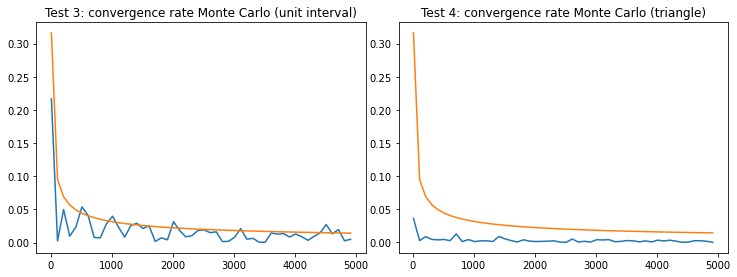

In [50]:
n = np.array(range(10, 5000, 100))

#Test 3: verify convergence rate 1/sqrt(n) with respect to number of quadrature points n.
f = lambda x: x**2 - 4*x + 5
real_f = integrate.quad(f, 0, 1)[0]
e = [abs(MC_quad(f, i) - real_f) for i in n]
fig, (uni, tri) = plt.subplots(1, 2)
uni.plot(n, e)
uni.plot(n, 1/np.sqrt(n))
uni.set_title("Test 3: convergence rate Monte Carlo (unit interval)")

# Test 4: verify convergence rate 1/sqrt(n) with respect to number of quadrature points n
f1 = lambda x, y: x**2 - y**2 + 6
real_f1 = integrate.dblquad(f1, 0, 1, lambda x: 0, lambda x: 1-x)[0]
e1 = [abs(MC_ref_triangle(f1, i) - real_f1) for i in n]
tri.plot(n, e1)
tri.plot(n, 1/np.sqrt(n))
tri.set_title("Test 4: convergence rate Monte Carlo (triangle)")

plt.subplots_adjust(left=0.3, bottom=0.1, right=1.9, top=0.9, wspace=0.1, hspace=7.4)
plt.show()



# **Discussion**

The two Gauss quadrature algorithms passed all tests. I experimented with higher-order polynomials as well and saw that the algorithms can approximate the integrals to integer values for 4th and 3rd order polynomials, which I think was kind of interesing.

The convergence rate of the two Monte Carlo functions follow the curve $\frac{1}{\sqrt{n}}$ pretty well. We can clearly see that the error decresases with a higher number of samples. 

